### Problem 3

Similar to 2, I only estimate beta with bias = 0, in all the tests below, I use
- warmup of learning rate
- learning rate decay for non-adaptive methods

In [3]:
from hw_1_3 import *
_, beta_est = nag(X, Y_gt, 0.01, d, beta_0)

NAG ended with L_1 diff as:  1.1847692899228934
Total time: 89.13268494606018 total steps: 10001


In [4]:
gd_loss = gd(X, Y_gt, 0.01, d, beta_est)

vanilla GD ended with L_1 diff as:  42.08500024090012
Total time: 86.5514760017395 total steps: 10001


In [11]:
nag_loss, _ = nag(X, Y_gt, 0.01, d, beta_est)

NAG ended with L_1 diff as:  0.0009671487964988679
Total time: 24.532387495040894 total steps: 2722


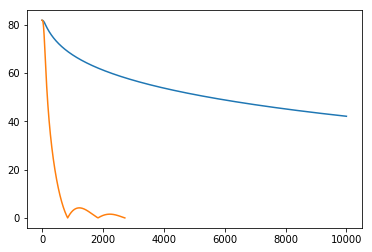

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(gd_loss)
plt.plot(nag_loss)
plt.show()

We see from above plot that
- NAG converges faster
- NAG yields better results at termination time
- L_1 loss from NAG shows disturbance
    - such disturbance goes smaller as time goes

SGD ended with L_1 diff as:  9.089506974905682
Total time: 2.2679333686828613
AdaGrad ended with L_1 diff as:  38.38244586420935
Total time: 2.4318063259124756
RMSprop ended with L_1 diff as:  9.675100723387237
Total time: 2.524564504623413
Adam ended with L_1 diff as:  8.363492159318252
Total time: 3.2511160373687744


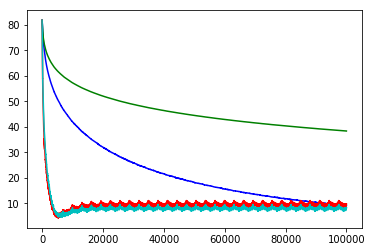

SGD ended with L_1 diff as:  9.119980024670259
Total time: 3.530276298522949
AdaGrad ended with L_1 diff as:  33.32072177295851
Total time: 3.88824725151062
RMSprop ended with L_1 diff as:  6.808032554722099
Total time: 4.166238307952881
Adam ended with L_1 diff as:  6.135580491122062
Total time: 5.348047733306885


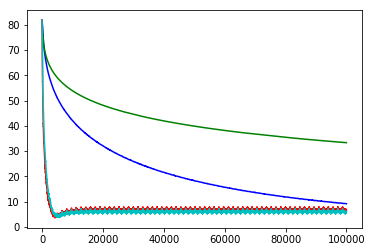

SGD ended with L_1 diff as:  9.130085547588333
Total time: 4.361374616622925
AdaGrad ended with L_1 diff as:  28.583852256471978
Total time: 4.767404556274414
RMSprop ended with L_1 diff as:  4.8515965149099864
Total time: 4.812380075454712
Adam ended with L_1 diff as:  4.491760740311056
Total time: 5.9629807472229


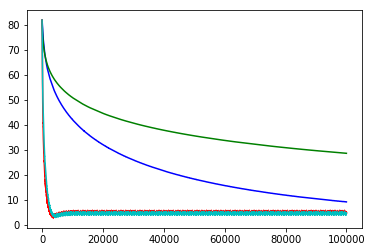

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
for batch_size in [32, 64, 128]:
    sgd_loss = sgd(X, Y_gt, 0.01, d, batch_size, beta_est)
    adagrad_loss = adagrad(X, Y_gt, 0.01, d, 1e-8, batch_size, beta_est)
    rmsprop_loss = rmsprop(X, Y_gt, 0.01, d, 1e-8, batch_size, beta_est)
    adam_loss = adam(X, Y_gt, 0.01, d, 0.9, 0.999, 1e-8, batch_size, beta_est)
    plt.clf()
    plt.plot(sgd_loss, color='b')
    plt.plot(adagrad_loss, color='g')
    plt.plot(rmsprop_loss, color='r')
    plt.plot(adam_loss, color='c')
    plt.show()

We conclude from above plot that
- for convergence speed: AdaGrad < SGD < RMSprop = Adam
    - only in this specific setting
    - Adam is slightly better than RMSprop
- AdaGrad does suffer from gradient vanishing
- generally speaking, all algorithms performs better under larger batch size
    - except for SGD, which hits the limit of 9.1x
- smaller batch size causes disturbance in L_1 loss after convergence of  RMSprop and Adam
    - with batch size grows, such disturbance gets smaller
- the gap between final result of SGD and (Adam or RMSprop) goes larger for larger batch size

In [4]:
from hw_1_3 import *
np.random.seed(1234)
sparse_rate = 0.3
M = np.random.uniform(size=(n,d)) < sparse_rate
X[M] = 0.
Y_gt = gen_label(X, beta_0)
_, beta_est = nag(X, Y_gt, 0.01, d, beta_0)

NAG ended with L_1 diff as:  1.8321787783273666
Total time: 91.06195950508118 total steps: 10001


SGD ended with L_1 diff as:  8.10032203795655
Total time: 2.1782093048095703
AdaGrad ended with L_1 diff as:  36.15153057116418
Total time: 2.404568672180176
RMSprop ended with L_1 diff as:  10.432561255866384
Total time: 2.516232967376709
Adam ended with L_1 diff as:  7.549515797378077
Total time: 3.3620452880859375


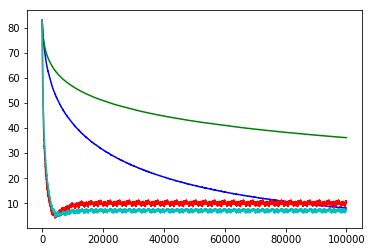

SGD ended with L_1 diff as:  8.09541736789895
Total time: 3.456721067428589
AdaGrad ended with L_1 diff as:  30.749326373660313
Total time: 3.843719482421875
RMSprop ended with L_1 diff as:  6.578302521043001
Total time: 3.987337589263916
Adam ended with L_1 diff as:  5.615495204777702
Total time: 4.9308106899261475


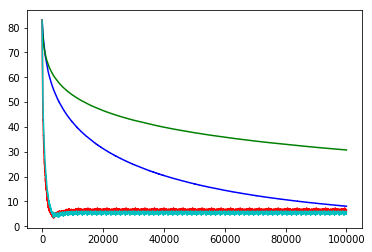

SGD ended with L_1 diff as:  8.094199734747038
Total time: 4.287536144256592
AdaGrad ended with L_1 diff as:  25.73220545695067
Total time: 4.7193779945373535
RMSprop ended with L_1 diff as:  4.727903580408079
Total time: 4.527889251708984
Adam ended with L_1 diff as:  4.183012679913681
Total time: 5.861323118209839


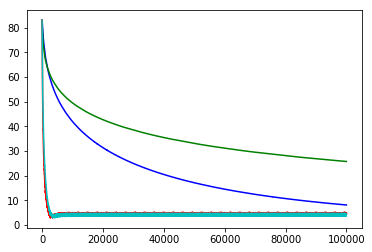

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
for batch_size in [32, 64, 128]:
    sgd_loss = sgd(X, Y_gt, 0.01, d, batch_size, beta_est)
    adagrad_loss = adagrad(X, Y_gt, 0.01, d, 1e-8, batch_size, beta_est)
    rmsprop_loss = rmsprop(X, Y_gt, 0.01, d, 1e-8, batch_size, beta_est)
    adam_loss = adam(X, Y_gt, 0.01, d, 0.9, 0.999, 1e-8, batch_size, beta_est)
    plt.clf()
    plt.plot(sgd_loss, color='b')
    plt.plot(adagrad_loss, color='g')
    plt.plot(rmsprop_loss, color='r')
    plt.plot(adam_loss, color='c')
    plt.show()

We can also derive conclusions similar to (2), besides
- gap between Adam and RMSprop bacomes larger in smaller batch_size
- L_1 diff at convergence remains the same for Adam and RMSprop regardless of sparsity
- the limit for SGD becomes smaller (8.1 v.s. 9.1)